### 1. Connecting with database

pip install mysql-connector-python

In [1]:
import mysql.connector
from mysql.connector import Error

def connect_to_database():
    try:
        # Replace with your MySQL server details
        connection = mysql.connector.connect(
            host='127.0.0.1',          
            user='root',      
            password='root',  
            database='finance_project' 
        )

        if connection.is_connected():
            print("Connected to the finance_project database")
            return connection
    except Error as e:
        print(f"Error: {e}")
        return None

# Call the function to connect
db_connection = connect_to_database()

# Close the connection when done
if db_connection:
    db_connection.close()
    print("Database connection closed.")


Connected to the finance_project database
Database connection closed.


In [2]:
pip install pyodbc


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Project Overview:
#### This project aims to identify potential customers for cross-selling opportunities within a banking environment. By analysing customer data that includes financial behavior, account status, transaction history, and other relevant attributes, the goal is to propose targeted financial products that may benefit each customer. The focus is on leveraging existing customer data to identify those who would most likely benefit from premium credit cards, loans, savings accounts, and other relevant products, thereby enhancing the bank's sales and customer satisfaction.

### 1. Coverting CSV files into sql dump files.

In [3]:
import pandas as pd
import sqlite3

#  Ensuring file path for Accounts data
accounts_data = "accounts_data.csv"  
desired_table_name = "accounts_data_file"  
output_file = "accounnts_data_dump.sql"  

# Step 1: Loading the CSV data into dataframe
df = pd.read_csv(accounts_data)

# Step 2: Creating SQLite in-memory database and export as SQL dump
conn = sqlite3.connect(":memory:")  
df.to_sql(desired_table_name, conn, if_exists="replace", index=False)  # Loading data in temperory table of sqldatabase

# Step 3: Generating SQL dump file
with open(output_file, "w") as f:
    for line in conn.iterdump():
        f.write(f"{line}\n")

print(f"SQL dump has been written to {output_file}")
conn.close()

SQL dump has been written to accounnts_data_dump.sql


In [4]:
import pandas as pd
import sqlite3

def csv_to_sql_dump(csv_file_path, output_sql_file_path, table_name="Branches"):
    try:
        df = pd.read_csv(csv_file_path)
        conn = sqlite3.connect(":memory:")
        df.to_sql(table_name, conn, if_exists="replace", index=False)
        with open(output_sql_file_path, "w") as f:
            for line in conn.iterdump():
                f.write(f"{line}\n")
        print(f"SQL dump has been written to {output_sql_file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        conn.close()

csv_to_sql_dump(
    csv_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\branches.csv",
    output_sql_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\branches_Dump.sql"
)

SQL dump has been written to E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\branches_Dump.sql


In [5]:
csv_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\accounts_data.csv"
output_sql_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\accounts_data_Dump.sql"
table_name="accounts"
csv_to_sql_dump(
    csv_file_path, output_sql_file_path,table_name
)

SQL dump has been written to E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\accounts_data_Dump.sql


In [6]:
csv_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\branches.csv"
output_sql_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\branches_Dump.sql"
table_name="branches"
csv_to_sql_dump(
    csv_file_path, output_sql_file_path,table_name
)


SQL dump has been written to E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\branches_Dump.sql


In [7]:
csv_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\customer_data.csv"
output_sql_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\customer_data_Dump.sql"
table_name="customers_data"
csv_to_sql_dump(
    csv_file_path, output_sql_file_path,table_name
)

SQL dump has been written to E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\customer_data_Dump.sql


In [8]:
csv_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\kyc_data.csv"
output_sql_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\kyc_data_Dump.sql"
table_name="kyc_data"
csv_to_sql_dump(
    csv_file_path, output_sql_file_path,table_name
)

SQL dump has been written to E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\kyc_data_Dump.sql


In [9]:
csv_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\loans.csv"
output_sql_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\loans_Dump.sql"
table_name="loans"
csv_to_sql_dump(
    csv_file_path, output_sql_file_path,table_name
)

SQL dump has been written to E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\loans_Dump.sql


In [10]:
csv_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\payments_data.csv"
output_sql_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\payments_data_Dump.sql"
table_name="payments"
csv_to_sql_dump(
    csv_file_path, output_sql_file_path,table_name
)

SQL dump has been written to E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\payments_data_Dump.sql


In [11]:
csv_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\transactions_data.csv"
output_sql_file_path=r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\transactions_data_Dump.sql"
table_name="transaction_data"
csv_to_sql_dump(
    csv_file_path, output_sql_file_path,table_name
)

SQL dump has been written to E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\transactions_data_Dump.sql


### 3. Importing SQL Dump Files into Database finance_project

In [12]:
import mysql.connector
from mysql.connector import Error

def import_sql_dump(db_connection, sql_file_path):
    
    try:
        cursor = db_connection.cursor()
        with open(sql_file_path, 'r') as f:
            sql_script = f.read()
        cursor.execute(sql_script, multi=True)
        db_connection.commit()
        print(f"SQL dump imported successfully from {sql_file_path}")
    except Error as e:
        print(f"Error importing SQL dump: {e}")
    finally:
        cursor.close()

# Establish database connection
db_connection = connect_to_database()

# List of SQL dump files
sql_files = [
    r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\SQL_DUMP_FILES\accounts_data_Dump.sql",
    r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\SQL_DUMP_FILES\branches_Dump.sql",
    r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\SQL_DUMP_FILES\customer_data_Dump.sql",
    r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\SQL_DUMP_FILES\kyc_data_Dump.sql",
    r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\SQL_DUMP_FILES\loans_Dump.sql",
    r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\SQL_DUMP_FILES\payments_data_Dump.sql",
    r"E:\USER\HP\Desktop\DATA ANALYTICS\Live Project\SQL_DUMP_FILES\transactions_data_Dump.sql"
]

# Import each SQL dump file
for sql_file in sql_files:
    import_sql_dump(db_connection, sql_file)

# Close the database connection
db_connection.close()

Connected to the finance_project database
Error importing SQL dump: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '"accounts" (
"account_id" REAL,
  "customer_id" REAL,
  "branch_id" REAL,
  "acc' at line 1
Error importing SQL dump: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'TRANSACTION;
CREATE TABLE "branches" (
"branch_id" INTEGER,
  "branch_name" TEXT' at line 1
Error importing SQL dump: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'TRANSACTION;
CREATE TABLE "customers_data" (
"customer_id" REAL,
  "first_name" ' at line 1
Error importing SQL dump: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right sy

### **Exploratory Data Analysis and Data Cleaning

In [102]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **ACCOUNTS DATA**

In [103]:
# Read csv file

accounts = pd.read_csv("accounts_data.csv")
accounts

,account_id,customer_id,branch_id,account_type,balance
0,261.0,780.0,9.0,Savings,39823.92
1,NaN,NaN,NaN,Savings,29520.04
2,846.0,711.0,5.0,Savings,48574.25
3,5.0,226.0,9.0,Savings,3631.82
4,89.0,923.0,2.0,Current,3463.25
...,...,...,...,...,...
1049,331.0,856.0,5.0,Savings,15573.92
1050,467.0,246.0,10.0,Savings,1784.18
1051,122.0,111.0,5.0,Savings,14402.99
1052,982.0,784.0,3.0,Savings,22647.17


### **Data Understanding

In [104]:
# Checking number of rows and columns.
accounts.shape

(1054, 5)

In [105]:
# 2. Check datatypes
accounts.dtypes

account_id      float64
customer_id     float64
branch_id       float64
account_type     object
balance         float64
dtype: object

In [106]:
# 3. Quick overview of first 10 rows
accounts.head(10)

,account_id,customer_id,branch_id,account_type,balance
0,261.0,780.0,9.0,Savings,39823.92
1,NaN,NaN,NaN,Savings,29520.04
2,846.0,711.0,5.0,Savings,48574.25
3,5.0,226.0,9.0,Savings,3631.82
4,89.0,923.0,2.0,Current,3463.25
5,458.0,837.0,3.0,Savings,4798.15
6,185.0,304.0,2.0,Current,29521.19
7,987.0,868.0,3.0,Savings,26621.31
8,368.0,222.0,6.0,Savings,14272.55
9,559.0,931.0,6.0,Savings,17450.31


In [107]:
# 4. Quick overview of last 10 rows
accounts.tail(10)

,account_id,customer_id,branch_id,account_type,balance
1044,344.0,960.0,6.0,Current,14333.09
1045,770.0,814.0,9.0,Savings,4391.81
1046,131.0,536.0,1.0,Savings,1453.33
1047,872.0,80.0,8.0,Current,22191.92
1048,88.0,179.0,5.0,Savings,13657.11
1049,331.0,856.0,5.0,Savings,15573.92
1050,467.0,246.0,10.0,Savings,1784.18
1051,122.0,111.0,5.0,Savings,14402.99
1052,982.0,784.0,3.0,Savings,22647.17
1053,861.0,126.0,1.0,Savings,49541.05


### **Identifying Missing and duplicate values

In [108]:
accounts.isnull().sum()

account_id      11
customer_id     11
branch_id       11
account_type     0
balance          0
dtype: int64

In [109]:
accounts.duplicated().sum()

43

In [110]:
accounts.dropna(inplace= True)

In [111]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    1043 non-null   float64
 1   customer_id   1043 non-null   float64
 2   branch_id     1043 non-null   float64
 3   account_type  1043 non-null   object 
 4   balance       1043 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.9+ KB


In [112]:
# Identifying which columns has dupliucate values.
duplicate_columns = []

for col in accounts.columns:
    if accounts[col].duplicated().any():
        duplicate_columns.append(col)

print(duplicate_columns)

['account_id', 'customer_id', 'branch_id', 'account_type', 'balance']


In [113]:
# Identifying unique values in each column
accounts.nunique()

account_id      1000
customer_id      645
branch_id         10
account_type       2
balance         1000
dtype: int64

In [114]:
# Finding count of duplicates in each column of dataframe
import pandas as pd

def analyze_dataframe(df):

  column_names = df.columns.tolist()
  duplicate_counts = {}

  for column in column_names:
    duplicate_counts[column] = df[column].duplicated().sum()

  return {
      "column_names": column_names,
      "duplicate_counts": duplicate_counts
  }

In [115]:
print (analyze_dataframe(accounts))

{'column_names': ['account_id', 'customer_id', 'branch_id', 'account_type', 'balance'], 'duplicate_counts': {'account_id': 43, 'customer_id': 398, 'branch_id': 1033, 'account_type': 1041, 'balance': 43}}


In [116]:
# remove duplicates from customer_id
accounts.drop_duplicates(['customer_id'], inplace= True)

In [117]:
#remove duplicates from account_id
accounts.drop_duplicates(['account_id'], inplace= True)

In [118]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    645 non-null    float64
 1   customer_id   645 non-null    float64
 2   branch_id     645 non-null    float64
 3   account_type  645 non-null    object 
 4   balance       645 non-null    float64
dtypes: float64(4), object(1)
memory usage: 30.2+ KB


In [119]:
# identifying data types of each column in dataframe
accounts.dtypes

account_id      float64
customer_id     float64
branch_id       float64
account_type     object
balance         float64
dtype: object

In [120]:
# converting datatypes

accounts['account_id']= accounts['account_id'].astype (int)
accounts['customer_id']= accounts['customer_id'].astype(int)
accounts['branch_id']= accounts['branch_id'].astype(int)

In [121]:
accounts.dtypes

account_id        int32
customer_id       int32
branch_id         int32
account_type     object
balance         float64
dtype: object

In [122]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    645 non-null    int32  
 1   customer_id   645 non-null    int32  
 2   branch_id     645 non-null    int32  
 3   account_type  645 non-null    object 
 4   balance       645 non-null    float64
dtypes: float64(1), int32(3), object(1)
memory usage: 22.7+ KB


## BRANCH DATA

In [123]:
branches = pd.read_csv("branches.csv")
branches

,branch_id,branch_name,branch_address
0,1,O11r,41101P
1,2,N12n,41102Q
2,3,R13n,41103R
3,4,P14i,41104S
4,5,Y15a,41105T
5,6,B16a,41106U
6,7,R17i,41107V
7,8,V18a,41108W
8,9,S19i,41109X
9,10,M20i,411010Y


In [124]:
branches.nunique().sum()

30

In [125]:
branches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   branch_id       10 non-null     int64 
 1   branch_name     10 non-null     object
 2   branch_address  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


## CUSTOMER DATA

In [126]:
# Read customer dataset file
customers = pd.read_csv ("customer_data.csv")
customers

,customer_id,first_name,last_name,email,phone,address
0,583.0,Raghav,Sane,jagdish86@example.com,9.150000e+11,"570\nDara Street, Chennai-240844"
1,514.0,Abhiram,Suresh,abhiram46@example.net,9.180000e+11,"110, Dhillon Ganj\nFirozabad 757923"
2,41.0,Mohini,Khare,aadisane@example.net,6.424635e+09,H.No. 072\nMistry Nagar\nShivpuri-529503
3,847.0,Avi,Lanka,mmadan@example.net,8.212147e+09,"719, Karpe Ganj\nGandhidham-140189"
4,500.0,Azad,Ravi,bishakha09@example.org,9.190000e+11,"728, Zachariah Circle, Chandrapur-478829"
...,...,...,...,...,...,...
1129,559.0,Ayush,Apte,devansh87@example.net,9.529537e+09,"78/44, Bhandari Marg, Mangalore-887955"
1130,27.0,Anay,Bajaj,bahadurjit92@example.org,9.100000e+11,H.No. 61\nVarty Zila\nSrikakulam-922364
1131,700.0,Yug,Atwal,chasmum89@example.com,9.160000e+11,"H.No. 71, Mall Ganj, Sri Ganganagar-873115"
1132,646.0,Simon,Sidhu,sanaya27@example.org,3.425246e+09,"H.No. 33\nSastry, Vadodara 655911"


In [127]:
# Checking null values and datatype
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1124 non-null   float64
 1   first_name   1132 non-null   object 
 2   last_name    1127 non-null   object 
 3   email        1119 non-null   object 
 4   phone        1129 non-null   float64
 5   address      1123 non-null   object 
dtypes: float64(2), object(4)
memory usage: 53.3+ KB


In [128]:
#Checking count of null values
customers.isnull().sum()

customer_id    10
first_name      2
last_name       7
email          15
phone           5
address        11
dtype: int64

In [129]:
#Removing null values
customers.dropna(inplace = True)

In [130]:
# Checking null count after removing the same
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1119 entries, 0 to 1133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1119 non-null   float64
 1   first_name   1119 non-null   object 
 2   last_name    1119 non-null   object 
 3   email        1119 non-null   object 
 4   phone        1119 non-null   float64
 5   address      1119 non-null   object 
dtypes: float64(2), object(4)
memory usage: 61.2+ KB


In [131]:
# Identifying duplicates
customers.duplicated().sum()

119

In [132]:
# Identying duplicates from each column of the dataframe
print(analyze_dataframe(customers))

{'column_names': ['customer_id', 'first_name', 'last_name', 'email', 'phone', 'address'], 'duplicate_counts': {'customer_id': 119, 'first_name': 662, 'last_name': 675, 'email': 119, 'phone': 478, 'address': 119}}


In [133]:
# Dropping duplicates from necessary columns
customers.drop_duplicates(['customer_id'], inplace = True)
customers.drop_duplicates(['email'], inplace = True)
customers.drop_duplicates(['address'], inplace = True)

In [134]:
#Checking data after removing duplicates
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1000 non-null   float64
 1   first_name   1000 non-null   object 
 2   last_name    1000 non-null   object 
 3   email        1000 non-null   object 
 4   phone        1000 non-null   float64
 5   address      1000 non-null   object 
dtypes: float64(2), object(4)
memory usage: 54.7+ KB


In [135]:
# Converting datatype float to integer
customers["customer_id"]= customers["customer_id"].astype (int)

In [136]:
# Removing unnecessary columns
customers.drop(["phone"], axis=1, inplace= True)

In [137]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1132
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1000 non-null   int32 
 1   first_name   1000 non-null   object
 2   last_name    1000 non-null   object
 3   email        1000 non-null   object
 4   address      1000 non-null   object
dtypes: int32(1), object(4)
memory usage: 43.0+ KB


## KYC DATASET

In [138]:
# Read file

kyc = pd.read_csv("kyc_data.csv")
kyc

,kyc_id,customer_id,aadhaar_number,kyc_status
0,1,470,8.025030e+11,Pending
1,2,527,3.686020e+10,Completed
2,3,909,3.430880e+11,Completed
3,4,707,3.906300e+11,Completed
4,5,537,8.604680e+11,Pending
...,...,...,...,...
495,496,714,3.902780e+11,Completed
496,497,706,9.670400e+11,Under Review
497,498,234,9.547240e+11,Pending
498,499,637,8.206750e+11,Under Review


In [139]:
kyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kyc_id          500 non-null    int64  
 1   customer_id     500 non-null    int64  
 2   aadhaar_number  500 non-null    float64
 3   kyc_status      500 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB


In [140]:
kyc.isnull().sum()

kyc_id            0
customer_id       0
aadhaar_number    0
kyc_status        0
dtype: int64

In [141]:
kyc.duplicated().sum()

0

In [142]:
print(analyze_dataframe(kyc))

{'column_names': ['kyc_id', 'customer_id', 'aadhaar_number', 'kyc_status'], 'duplicate_counts': {'kyc_id': 0, 'customer_id': 0, 'aadhaar_number': 0, 'kyc_status': 497}}


In [143]:
kyc.drop(["aadhaar_number"], axis=1, inplace= True)

In [144]:
kyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   kyc_id       500 non-null    int64 
 1   customer_id  500 non-null    int64 
 2   kyc_status   500 non-null    object
dtypes: int64(2), object(1)
memory usage: 11.8+ KB


## LOANS DATASET

In [145]:
# Read csv file

loans = pd.read_csv ("loans.csv")
loans

,loan_id,customer_id,loan_type,loan_amount,interest_rate,loan_status
0,41.0,46.0,Auto,33255.74,9.49,Closed
1,26.0,830.0,Auto,321873.96,6.22,Active
2,235.0,134.0,Home,44524.99,5.59,Closed
3,27.0,529.0,Personal,411853.83,5.52,Active
4,486.0,354.0,Auto,414024.48,8.75,Closed
...,...,...,...,...,...,...
559,72.0,887.0,Auto,484274.04,6.32,Active
560,107.0,670.0,Personal,488043.14,8.54,Closed
561,271.0,183.0,Home,243649.75,9.06,Closed
562,436.0,504.0,Personal,314972.12,8.46,Closed


In [146]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_id        550 non-null    float64
 1   customer_id    549 non-null    float64
 2   loan_type      561 non-null    object 
 3   loan_amount    564 non-null    float64
 4   interest_rate  549 non-null    float64
 5   loan_status    563 non-null    object 
dtypes: float64(4), object(2)
memory usage: 26.6+ KB


In [147]:
loans.isnull().sum()

loan_id          14
customer_id      15
loan_type         3
loan_amount       0
interest_rate    15
loan_status       1
dtype: int64

In [148]:
loans.dropna(inplace= True)

In [149]:
loans.duplicated().sum()

49

In [150]:
print(analyze_dataframe(loans))

{'column_names': ['loan_id', 'customer_id', 'loan_type', 'loan_amount', 'interest_rate', 'loan_status'], 'duplicate_counts': {'loan_id': 49, 'customer_id': 154, 'loan_type': 546, 'loan_amount': 49, 'interest_rate': 228, 'loan_status': 547}}


In [151]:
loans.drop_duplicates(['loan_id'], inplace = True)

In [152]:
loans["loan_id"]= loans["loan_id"].astype (int)
loans["customer_id"]= loans ["customer_id"].astype(int)

In [153]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 563
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_id        500 non-null    int32  
 1   customer_id    500 non-null    int32  
 2   loan_type      500 non-null    object 
 3   loan_amount    500 non-null    float64
 4   interest_rate  500 non-null    float64
 5   loan_status    500 non-null    object 
dtypes: float64(2), int32(2), object(2)
memory usage: 23.4+ KB


## PAYMENTS DATASET

In [154]:
# Load csv files

payments = pd.read_csv("payments_data.csv")
payments

,payment_id,loan_id,payment_amount
0,1,146,4173.75
1,2,83,4760.15
2,3,148,2155.38
3,4,36,1231.63
4,5,367,1019.98
...,...,...,...
1995,1996,421,2593.86
1996,1997,263,4460.65
1997,1998,304,2864.80
1998,1999,334,3719.09


In [155]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   payment_id      2000 non-null   int64  
 1   loan_id         2000 non-null   int64  
 2   payment_amount  2000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


In [156]:
#Identifying null values
payments.isnull().sum()

payment_id        0
loan_id           0
payment_amount    0
dtype: int64

In [157]:
payments.nunique().sum()

4489

In [158]:
# Identify duplicates
payments.duplicated().sum()

0

In [159]:
# Identifying duplicate values from each column of dataframe
print(analyze_dataframe(payments))

{'column_names': ['payment_id', 'loan_id', 'payment_amount'], 'duplicate_counts': {'payment_id': 0, 'loan_id': 1508, 'payment_amount': 3}}


## TRANSACTION DATASET

In [160]:
# Reading csv file

transaction = pd.read_csv("transactions_data.csv")
transaction

,transaction_id,account_id,transaction_type,amount
0,1302,178,Deposit,3896.27
1,592,769,Withdrawal,3813.22
2,1074,791,Withdrawal,665.38
3,1804,493,Withdrawal,1927.07
4,30,518,Deposit,1981.06
...,...,...,...,...
2056,1639,299,Deposit,1470.71
2057,1096,926,Withdrawal,2133.12
2058,1131,512,Deposit,689.72
2059,1295,657,Withdrawal,786.11


In [161]:
# Analysing the short info about dataframe
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    2061 non-null   int64  
 1   account_id        2061 non-null   int64  
 2   transaction_type  2061 non-null   object 
 3   amount            2061 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 64.5+ KB


In [162]:
# Identifying null values
transaction.isnull().sum()

transaction_id      0
account_id          0
transaction_type    0
amount              0
dtype: int64

In [163]:
# Identifying duplicate values
transaction.duplicated().sum()

61

In [164]:
# Identifying duplicate values from each column of dataframe
print(analyze_dataframe(transaction))

{'column_names': ['transaction_id', 'account_id', 'transaction_type', 'amount'], 'duplicate_counts': {'transaction_id': 61, 'account_id': 1191, 'transaction_type': 2059, 'amount': 65}}


In [165]:
# Removing duplicates from transaction_id
transaction.drop_duplicates(["transaction_id"],inplace= True)

## DATAFRAME MERGING

In [166]:
merged_df1 = customers.merge(accounts)
merged_df1

,customer_id,first_name,last_name,email,address,account_id,branch_id,account_type,balance
0,583,Raghav,Sane,jagdish86@example.com,"570\nDara Street, Chennai-240844",713,10,Savings,48342.49
1,847,Avi,Lanka,mmadan@example.net,"719, Karpe Ganj\nGandhidham-140189",970,4,Savings,26393.87
2,502,Max,Bhat,seshadridalbir@example.net,"773\nMaster, Bhalswa Jahangir Pur 811115",934,6,Savings,14060.56
3,532,Theodore,Balakrishnan,vandra@example.net,"271, Oak Road\nBikaner 285378",933,4,Savings,48693.24
4,783,Aashi,Varughese,utalwar@example.net,"23/721, Prabhu Chowk\nBhilwara 396915",15,8,Savings,6847.94
...,...,...,...,...,...,...,...,...,...
640,742,Yauvani,Kari,quincy61@example.com,"90/805, Kothari Street, Ajmer 811449",240,7,Current,2549.90
641,371,Pranit,Sarna,ishitamorar@example.org,"95, Balay Road, Anantapur 658175",868,5,Savings,44289.01
642,752,Faqid,Jain,cchakrabarti@example.com,91\nKannan Zila\nSikar-638874,287,6,Savings,30952.90
643,647,Raghav,Batra,garayatin@example.net,99\nDugal Marg\nMedininagar-547618,915,9,Savings,14818.51


In [167]:
merged_df2 = customers.merge(kyc)
merged_df2

,customer_id,first_name,last_name,email,address,kyc_id,kyc_status
0,583,Raghav,Sane,jagdish86@example.com,"570\nDara Street, Chennai-240844",242,Pending
1,41,Mohini,Khare,aadisane@example.net,H.No. 072\nMistry Nagar\nShivpuri-529503,104,Completed
2,500,Azad,Ravi,bishakha09@example.org,"728, Zachariah Circle, Chandrapur-478829",35,Under Review
3,502,Max,Bhat,seshadridalbir@example.net,"773\nMaster, Bhalswa Jahangir Pur 811115",160,Pending
4,668,Raagini,Saha,hkapur@example.com,"148, Dutta Nagar, Morbi-877032",34,Pending
...,...,...,...,...,...,...,...
495,511,George,Lala,vedant09@example.net,"190, Bawa, Aligarh 077275",82,Pending
496,75,Kamala,Vala,nakshchoudhry@example.com,"90, Sengupta Zila\nShahjahanpur 994267",208,Completed
497,371,Pranit,Sarna,ishitamorar@example.org,"95, Balay Road, Anantapur 658175",55,Completed
498,279,Nidhi,Sama,ubikachoudhury@example.com,45/96\nGola Street\nAmravati 859499,83,Completed


In [168]:
merged_df3 = customers.merge(loans)
merged_df3

,customer_id,first_name,last_name,email,address,loan_id,loan_type,loan_amount,interest_rate,loan_status
0,583,Raghav,Sane,jagdish86@example.com,"570\nDara Street, Chennai-240844",311,Personal,82235.81,9.34,Active
1,583,Raghav,Sane,jagdish86@example.com,"570\nDara Street, Chennai-240844",490,Personal,121314.55,7.21,Closed
2,514,Abhiram,Suresh,abhiram46@example.net,"110, Dhillon Ganj\nFirozabad 757923",55,Home,32128.65,8.02,Active
3,514,Abhiram,Suresh,abhiram46@example.net,"110, Dhillon Ganj\nFirozabad 757923",218,Personal,304610.38,8.70,Closed
4,41,Mohini,Khare,aadisane@example.net,H.No. 072\nMistry Nagar\nShivpuri-529503,42,Auto,465058.76,5.39,Active
...,...,...,...,...,...,...,...,...,...,...
495,279,Nidhi,Sama,ubikachoudhury@example.com,45/96\nGola Street\nAmravati 859499,192,Home,45017.99,5.00,Active
496,674,Fitan,Bose,riyathakkar@example.org,"31/06\nGoswami Nagar, Gandhidham 534332",80,Home,42039.36,7.47,Active
497,988,Veer,Som,hkar@example.com,H.No. 28\nSha Chowk\nCuttack-527559,272,Auto,485583.93,6.65,Closed
498,39,Viraj,Boase,xbava@example.com,"985\nVohra Zila, Nangloi Jat 923057",117,Personal,432759.71,8.05,Closed


In [169]:
merge_df4 = loans.merge(payments)
merge_df4

,loan_id,customer_id,loan_type,loan_amount,interest_rate,loan_status,payment_id,payment_amount
0,41,46,Auto,33255.74,9.49,Closed,389,1983.30
1,41,46,Auto,33255.74,9.49,Closed,876,3647.88
2,41,46,Auto,33255.74,9.49,Closed,1454,1286.57
3,41,46,Auto,33255.74,9.49,Closed,1641,1375.54
4,41,46,Auto,33255.74,9.49,Closed,1678,3426.75
...,...,...,...,...,...,...,...,...
1995,436,504,Personal,314972.12,8.46,Closed,771,4021.97
1996,103,853,Auto,233355.73,9.72,Closed,175,2899.46
1997,103,853,Auto,233355.73,9.72,Closed,1145,1025.74
1998,103,853,Auto,233355.73,9.72,Closed,1260,2082.54


In [170]:
merge_df5 = accounts.merge(transaction)
merge_df5

,account_id,customer_id,branch_id,account_type,balance,transaction_id,transaction_type,amount
0,261,780,9,Savings,39823.92,790,Withdrawal,4958.93
1,261,780,9,Savings,39823.92,9,Withdrawal,2194.14
2,846,711,5,Savings,48574.25,1190,Withdrawal,2081.64
3,846,711,5,Savings,48574.25,1986,Withdrawal,1508.35
4,5,226,9,Savings,3631.82,583,Deposit,4138.82
...,...,...,...,...,...,...,...,...
1301,331,856,5,Savings,15573.92,1180,Withdrawal,971.59
1302,331,856,5,Savings,15573.92,1241,Withdrawal,3589.22
1303,331,856,5,Savings,15573.92,253,Deposit,2287.66
1304,861,126,1,Savings,49541.05,928,Withdrawal,1169.78


In [171]:
merge_df6= accounts.merge(branches)
merge_df6

,account_id,customer_id,branch_id,account_type,balance,branch_name,branch_address
0,261,780,9,Savings,39823.92,S19i,41109X
1,846,711,5,Savings,48574.25,Y15a,41105T
2,5,226,9,Savings,3631.82,S19i,41109X
3,89,923,2,Current,3463.25,N12n,41102Q
4,458,837,3,Savings,4798.15,R13n,41103R
...,...,...,...,...,...,...,...
640,806,408,5,Savings,30699.78,Y15a,41105T
641,770,814,9,Savings,4391.81,S19i,41109X
642,872,80,8,Current,22191.92,V18a,41108W
643,331,856,5,Savings,15573.92,Y15a,41105T


## DATA VISUALIZATION

### 1. Customer Demographics:

### a) Customer Distribution Across Branches

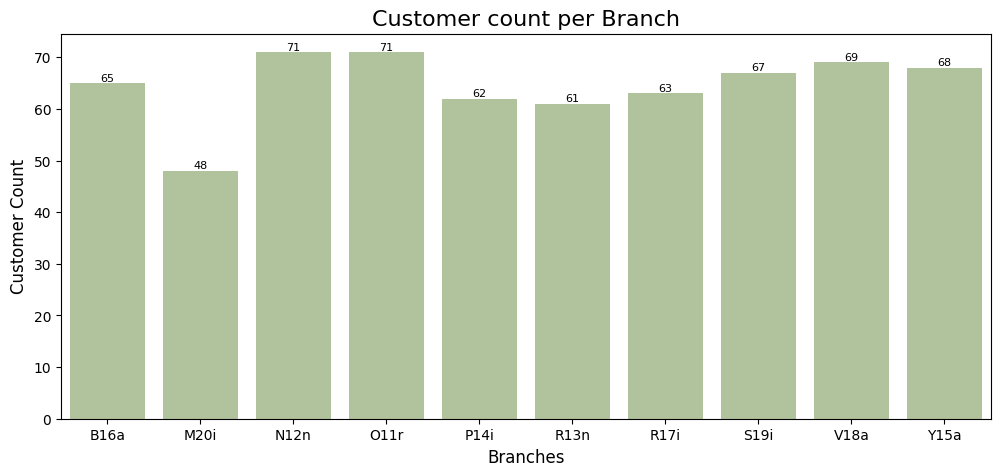

In [172]:
# Customer count per Branch
merged_df6= accounts.merge(branches)
customer_per_branch = merged_df6.groupby("branch_name")["customer_id"].count().reset_index()

plt.figure(figsize=(12,5))
data_labels = sns.barplot(data= customer_per_branch, x="branch_name", y= "customer_id", color= '#B1C995')
for container in data_labels.containers:
    data_labels.bar_label(container, label_type='edge', fontsize = 8)
plt.title("Customer count per Branch", fontsize= 16)
plt.xlabel("Branches", fontsize= 12)
plt.ylabel("Customer Count", fontsize= 12)
plt.show()

##### Conclusion: Branch N12n & O11r has most customer count showing more satisfaction as compared to M20i, suggesting investigation why M20i has fewer customers and implement strategies like targeted marketing or improving branch-specific services to attract more customers.

### b) Highest & Lowest Balance analysis per Branch of the customer

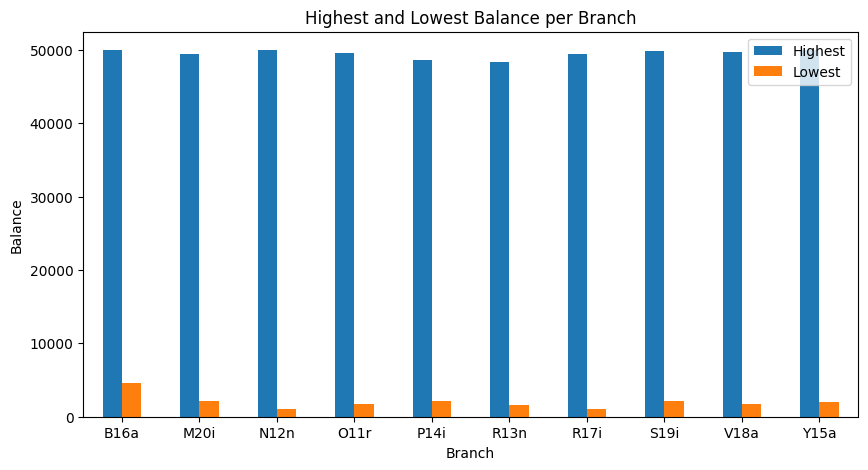

In [173]:
# Highest and lowest balance per branch
merged_df= accounts.merge(branches)
top_customers = merged_df.groupby('branch_name')['balance'].max()
bottom_customers = merged_df.groupby('branch_name')['balance'].min()

result_df = pd.DataFrame({'Branch': top_customers.index,
                           'Highest': top_customers.values,
                           'Lowest': bottom_customers.values})

result_df.plot(x='Branch', kind='bar', figsize=(10, 5))
plt.title('Highest and Lowest Balance per Branch')
plt.ylabel('Balance')
plt.xlabel('Branch')
plt.xticks(rotation=0)
plt.show()

##### Conclusion: The graph shows the highest and lowest customer balances across different branches. Branch "Y15a" has the most money, while "B16a" has the least. To make more money, the company should focus on branches with higher balances, understand why some branches have lower balances, offer special deals to high-value customers, and improve customer service.

### c) Customer with highest & lowest balance in each branch

In [174]:
# Customer with highest & lowest balance in each branch
merged_df = accounts.merge(customers, on='customer_id')  #merged accounts data with customers data
grouped_df = merged_df.groupby('branch_id').agg(
    highest_balance=('balance', 'max'),
    lowest_balance=('balance', 'min')
).reset_index()                         #Find highest and lowest balance for each branch

result_df = merged_df.merge(grouped_df, on='branch_id', how='outer')
result_df = result_df[(result_df['balance'] == result_df['highest_balance']) | 
                      (result_df['balance'] == result_df['lowest_balance'])]
(result_df[['branch_id', 'customer_id','balance']])

,branch_id,customer_id,balance
24,1,45,1689.74
70,1,126,49541.05
83,2,386,49963.57
129,2,883,1095.96
148,3,117,48385.60
154,3,271,1569.27
213,4,81,2173.92
259,4,532,48693.24
290,5,125,49999.93
297,5,494,2054.68


##### Conclusion: The data reveals that Branch 5 has the highest customer balance, while Branch 2 has the lowest. To optimize profits, the company should focus on high-balance branches, analyze low-balance branches, segment customers based on their balances, and enhance customer experience. Focus on retaining high-balance customers by offering personalized services, exclusive rewards, and proactive outreach.

### d) Current and Savings Account Per Branch

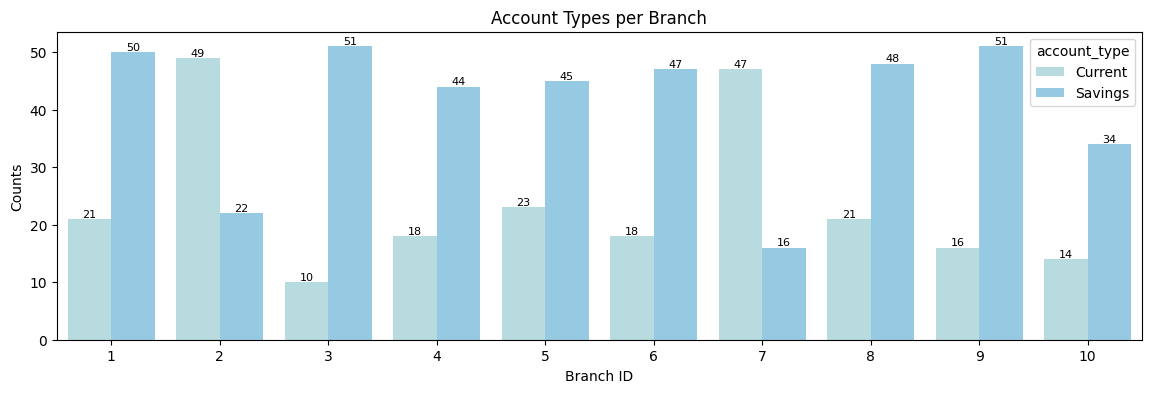

In [175]:
merged_df7 = accounts.merge(branches)
grouped_df2 = merged_df7.groupby(['branch_id', 'account_type']).size().reset_index(name='count')

colors = ['#B0E0E6', '#89CFF0']
plt.figure(figsize=(14, 4))
data_labels = sns.barplot(x='branch_id', y='count', hue='account_type', data=grouped_df2, palette= colors)
for container in data_labels.containers:
    data_labels.bar_label(container, label_type='edge', fontsize =8)
plt.xlabel('Branch ID')
plt.ylabel('Counts')
plt.title('Account Types per Branch')
plt.show()

##### Conclusion: The graph shows the distribution of current and savings accounts across different branches. Branch 10 has the highest number of current accounts, while Branch 3 has the highest number of savings accounts. To optimize the product mix and customer satisfaction, the bank should implement targeted marketing, product bundling, CRM, employee training, and digital banking initiatives.

### e) Analysing difference between Highest and Lowest Balance in each Branch

   branch_id  max_balance  min_balance  balance_difference
0          1     49541.05      1689.74            47851.31
1          2     49963.57      1095.96            48867.61
2          3     48385.60      1569.27            46816.33
3          4     48693.24      2173.92            46519.32
4          5     49999.93      2054.68            47945.25
5          6     49954.66      4582.90            45371.76
6          7     49477.37      1044.74            48432.63
7          8     49707.23      1728.44            47978.79
8          9     49885.20      2083.21            47801.99
9         10     49419.76      2126.26            47293.50


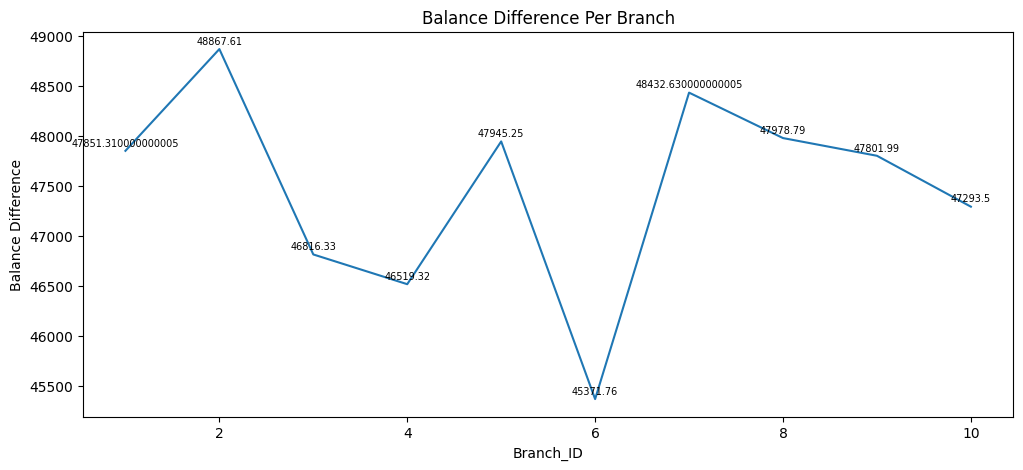

In [176]:
# Analysing difference between Highest and Lowest Balance in each Branch
merged_df = accounts.merge(branches)
grouped_df = merged_df.groupby('branch_id').agg(max_balance=('balance', 'max'), min_balance=('balance', 'min')).reset_index()

grouped_df['balance_difference'] = grouped_df['max_balance'] - grouped_df['min_balance']
print(grouped_df) 

plt.figure(figsize=(12, 5))
plt.plot(grouped_df['branch_id'], grouped_df['balance_difference'])
for i, row in grouped_df.iterrows():
    plt.text(row['branch_id'], row['balance_difference'] + 50, str(row['balance_difference']), ha='center', fontsize = 7) 
plt.xlabel('Branch_ID')
plt.ylabel('Balance Difference')
plt.title('Balance Difference Per Branch')
plt.grid(False)
plt.show()

##### Conclusion: There's a significant difference between the highest and lowest balances across branches. This suggests that some branches are performing better than others in terms of customer spending and account balances.
##### Focus the branches having highest balance difference, analyse the root cause and implement the startefies to improve the branch performances.
##### Additionally, prioritize customer satisfaction by improving service quality, addressing complaints, and offering personalized financial solutions.

### f) Well Performing Branches

In [177]:
# Well Performing Branches
Performing_branches = merged_df.groupby('branch_name').agg(Number_of_Customers = ('customer_id', 'nunique'), 
                                                              Number_of_Accounts = ('account_id', 'nunique'), 
                                                               Maximum_Balance= ('balance', 'max')
                                                              ) 

top_customers = Performing_branches.nlargest(3, 'Number_of_Customers')
top_accounts = Performing_branches.nlargest(3, 'Number_of_Accounts')
top_balance = Performing_branches.nlargest(3, 'Maximum_Balance')

top_branches = pd.concat([top_customers, top_accounts, top_balance])
print(top_branches.head(5))

             Number_of_Customers  Number_of_Accounts  Maximum_Balance
branch_name                                                          
N12n                          71                  71         49963.57
O11r                          71                  71         49541.05
V18a                          69                  69         49707.23
N12n                          71                  71         49963.57
O11r                          71                  71         49541.05


##### Conclusion: Branches N12n, O11r, and V18a are consistently among the top performers in terms of customer base, account numbers, and maximum balance. This indicates their strong performance across key metrics.

### g) KYC Status of Customers

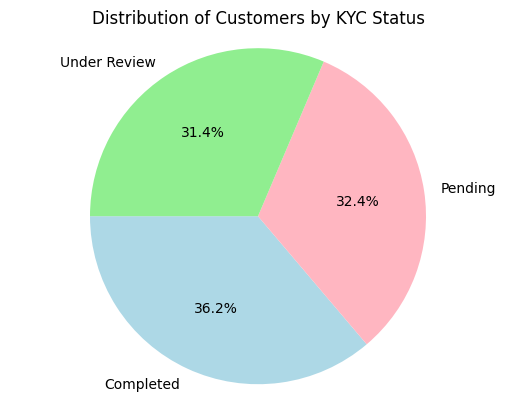

In [178]:
# KYC Status of Customers
merged_df = customers.merge(kyc)

grouped_df2 = merged_df.groupby(['kyc_status']).size().to_frame(name = 'count').reset_index()
colors = ['lightblue', 'lightpink', 'lightgreen']

plt.pie(grouped_df2['count'], labels=grouped_df2['kyc_status'], autopct='%1.1f%%', startangle=180, colors = colors)
plt.title('Distribution of Customers by KYC Status')
plt.axis('equal')
plt.show()

##### Conclusion: there are still bottlenecks in the "Pending" and "Under Review" stages.
##### Prioritize pending cases, streamline the verification process, and enhance customer communication.

### h) Type of Loans customers are perferring most

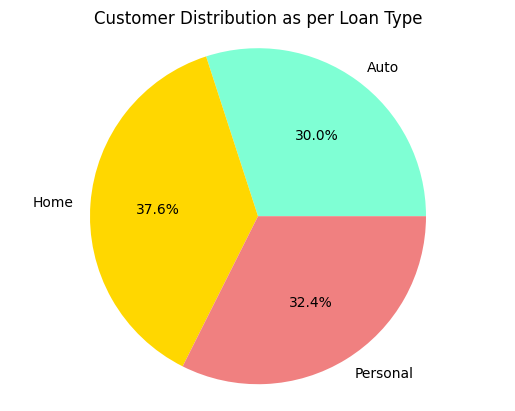

In [179]:
# Type of Loans customers are perferring most
merged_df = customers.merge(loans)

grouped_df = merged_df.groupby(['loan_type']).size().to_frame(name = 'count').reset_index()

custom_colours = ['aquamarine', 'Gold', 'LightCoral']
plt.pie(grouped_df['count'], labels=grouped_df['loan_type'], autopct='%1.1f%%', startangle=360, colors =  custom_colours)
plt.title('Customer Distribution as per Loan Type')
plt.axis('equal')
plt.show()

##### Conclusion: Customers are mostly preffering Home loan. 
##### Focus on home loans: Since it's the most popular, make sure the bank offers the best home loan deals.
##### Promote personal loans: Try to get more people to take out personal loans by offering good rates and easy approval.

### i) Highest & Lowest Interest Rate as per loan type

In [180]:
# Highest & Lowest Interest Rate as per loan type
grouped_df = merged_df.groupby(['loan_type']).agg(
    maximum_interest=('interest_rate', 'max'),
    minimum_interest=('interest_rate', 'min'),
    average_interest= ('interest_rate','mean')
).reset_index()

print(grouped_df)

  loan_type  maximum_interest  minimum_interest  average_interest
0      Auto              9.96              5.05           7.38920
1      Home              9.91              5.00           7.55266
2  Personal              9.98              5.02           7.47821


### j) Loan status of customers

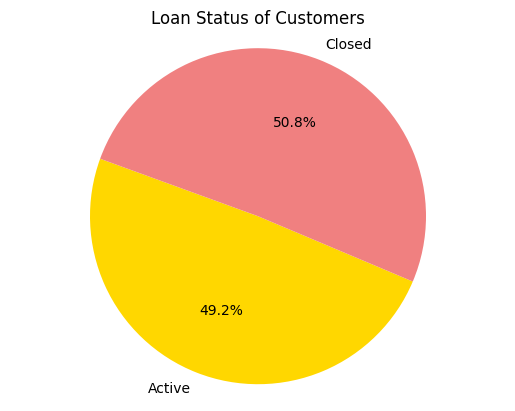

In [181]:
# Loan status of customers
merged_df = customers.merge(loans)

grouped_df = merged_df.groupby(['loan_status']).size().to_frame(name = 'count').reset_index()
custom_colours = ['Gold', 'LightCoral']
plt.pie(grouped_df['count'], labels=grouped_df['loan_status'], autopct='%1.1f%%', startangle=160, colors = custom_colours)
plt.title('Loan Status of Customers')
plt.axis('equal')
plt.show()

### k)Highest and Lowest interest rate for active and closed loan.

In [182]:
# Highest and Lowest interest rate for active and closed loan.
grouped_df = merged_df.groupby(['loan_status']).agg(
    maximum_interest=('interest_rate', 'max'),
    minimum_interest=('interest_rate', 'min')
).reset_index()
print(grouped_df)

  loan_status  maximum_interest  minimum_interest
0      Active              9.98              5.00
1      Closed              9.92              5.02


### l) Number of Customers having Active loan status

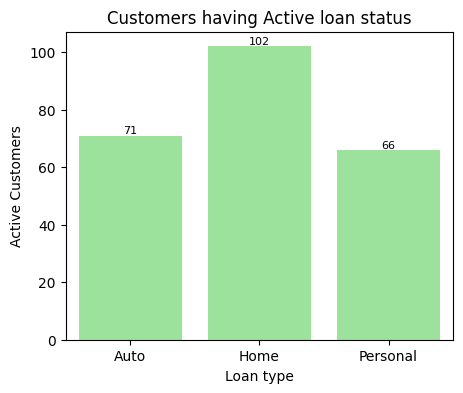

In [183]:
# Number of Customers having Active loan status
merged_df = customers.merge(loans)

count_active_loan_customers = merged_df[merged_df['loan_status'] =='Active']
customer_counts_by_loan_type = count_active_loan_customers.groupby('loan_type')['customer_id'].nunique()

plt.figure(figsize=(5,4))
data_labels = sns.barplot(x=customer_counts_by_loan_type.index, y=customer_counts_by_loan_type.values, color= 'lightgreen') 
for container in data_labels.containers:
    data_labels.bar_label(container, label_type='edge', fontsize = 8)
plt.xlabel('Loan Type')
plt.xlabel('Loan type')
plt.ylabel('Active Customers')
plt.title('Customers having Active loan status')
plt.show()

##### Conclusion: The chart shows active customers loans for different things like auto, homes, and personal stuff. Most people have active home loans, followed by personal loans and then auto loans.

### m) Customers having more than 1 loan currently

In [184]:
# Customers having more than 1 loan currently
merged_df = customers.merge(loans)
count_active_loan_customers = merged_df[merged_df['loan_status'] =='Active']
customer_counts = merged_df.groupby('customer_id').size()
multiple_loans_customers = customer_counts[customer_counts > 1]

result_df = df[df['customer_id'].isin(multiple_loans_customers.index)]
final_df = result_df[['customer_id']].nunique().sum()
print(f"The number of customer having more than 1 loan is: ", final_df)

The number of customer having more than 1 loan is:  66


##### Conclusion: The data shows that 66 customers have taken out more than one loan. This means these customers trust the bank and are likely to take out more loans in the future.
##### Combine different loans into one package with special interest rates and fees.

### n) Maximum & Minimum Loan Amount

In [185]:
# Maximum & Minimum Loan Amount
merged_df = loans.merge(payments)
merged_df

maximum_loan_amount = merged_df['loan_amount'].max()
minimum_loan_amount = merged_df['loan_amount'].min()
print("Maximum Loan Amount: ", maximum_loan_amount)
print("Minimum Loan Amount: ", minimum_loan_amount)

Maximum Loan Amount:  499987.64
Minimum Loan Amount:  12196.68


### o) Total Balance of all accounts per branch

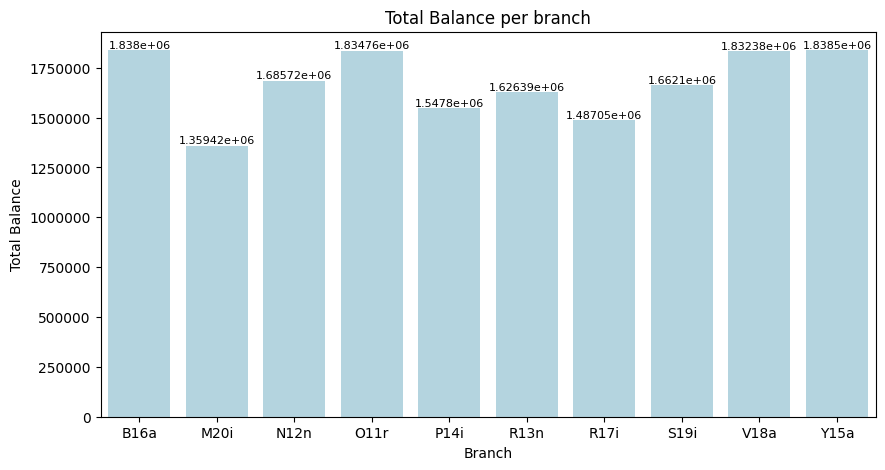

In [186]:
#Total Balance of all accounts per branch
merge_df = accounts.merge(branches)
total_bal_per_branch = merge_df.groupby('branch_name')['balance'].sum()

total_bal_per_branch_df = total_bal_per_branch.to_frame(name='balance') 
plt.figure(figsize=(10, 5))
data_labels = sns.barplot(x='branch_name', y='balance', data=total_bal_per_branch_df, color='lightblue')
for container in data_labels.containers:
    data_labels.bar_label(container, label_type='edge', fontsize=8)
plt.title('Total Balance per branch')
plt.xlabel('Branch')
plt.ylabel('Total Balance')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)
plt.show()

##### Conclusion: Branches with the most money i.e B16a, O11r, V18a and Y15a are doing well, so the bank should focus on keeping their customers happy and attracting new ones.
##### Branches with less money i.e M20i and R17i can offer special deals or promotions to attract more customers and increase the balance in these branches.

### p) Balances across different account types per branch


<Figure size 2000x500 with 0 Axes>

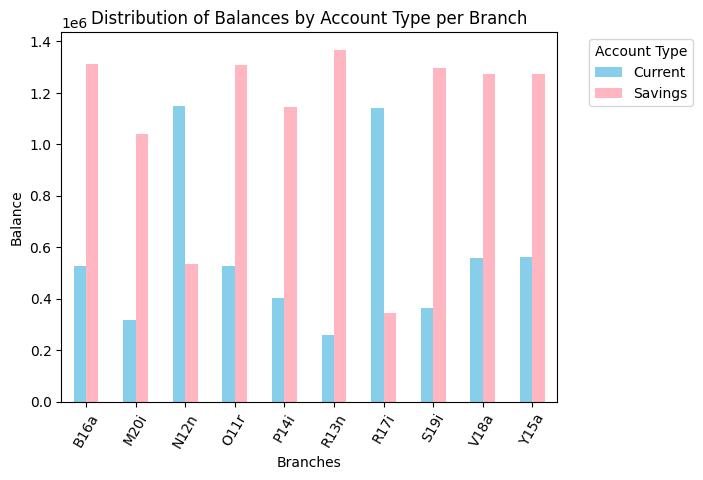

In [187]:
#Balances across different account types per branch
merge_df = accounts.merge(branches)
types_bal_per_branch = merge_df.groupby(['branch_name', 'account_type'])['balance'].sum().unstack()

plt.figure(figsize=(20,5))
types_bal_per_branch.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.xlabel('Branches')
plt.ylabel('Balance')
plt.title('Distribution of Balances by Account Type per Branch')
plt.legend(title="Account Type", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=60)
plt.show()

##### Conclusion:R13n branch having the highest savings account as well as least current accounts as well, whereas N12n has highest current accounts and  R17i has least savings account. 
##### Offer deals or incentives to get people to use both types of accounts and make sure employees can explain the benefits of different account types and help customers choose the right ones.

### q) Total no. of transactions processed per branch 

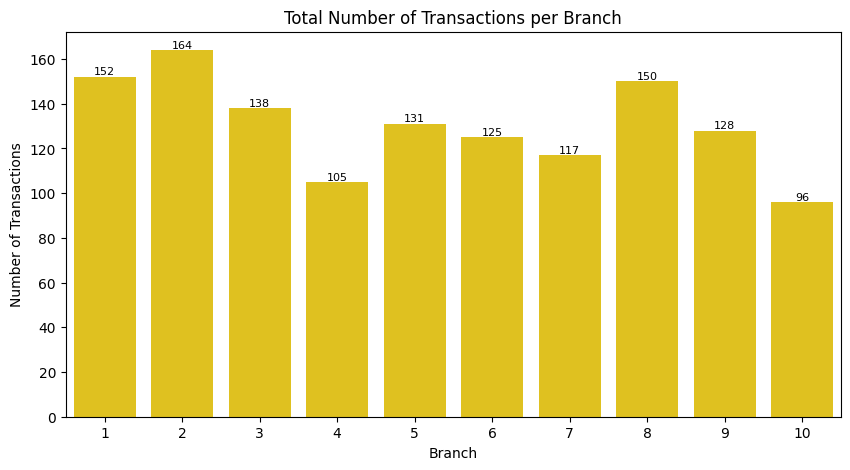

In [188]:
# Total no. of transactions processed per branch
merged_df = accounts.merge(transaction)
transaction_count_per_branch = merged_df.groupby('branch_id')['transaction_id'].count()

transaction_count_df = transaction_count_per_branch.to_frame(name='transaction_id')

plt.figure(figsize=(10, 5))
data_labels = sns.barplot(x='branch_id', y='transaction_id', data=transaction_count_df, color='Gold')
for container in data_labels.containers:
    data_labels.bar_label(container, label_type='edge', fontsize=8)
plt.title('Total Number of Transactions per Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

##### Conclusion: Branch 2 is the busiest, while Branch 10 is the least busy.
##### Give bonuses or special perks to the employees at the busiest branches to keep them motivated.
##### Figure out why some branches are less busy? Is it because of location, hours, or something else? The bank can make changes to attract more customers to these branches.
##### Train employees to be friendly and helpful as Good customer service can make a big difference in how many customers choose a particular branch.

### r) Distribution of transaction types per branch (count)

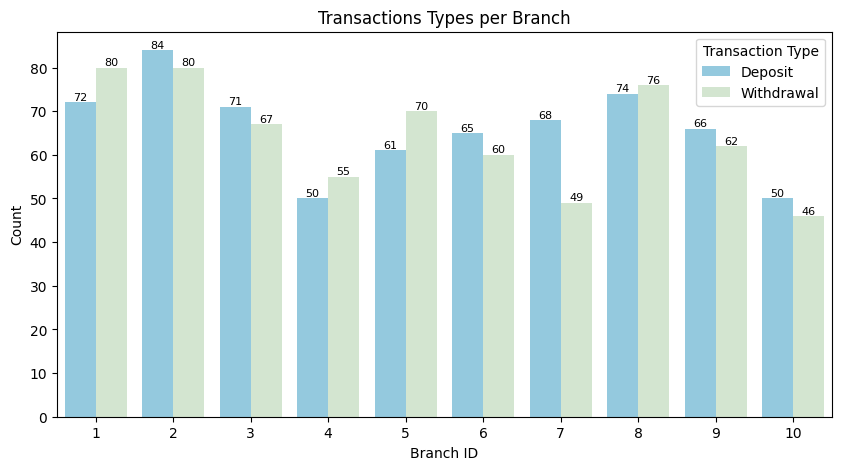

In [189]:
# Distribution of transaction types per branch (count)
merged_df = accounts.merge(transaction)
transaction_types_per_branch = merged_df.groupby(['branch_id', 'transaction_type'])['balance'].size().unstack()

colors = ['#87CEEB', '#D1E8CD']
melted_data = transaction_types_per_branch.reset_index().melt(
    id_vars='branch_id', 
    var_name='transaction_type', 
    value_name='count'
)
plt.figure(figsize=(10, 5))
data_labels=sns.barplot(x='branch_id',y='count',hue='transaction_type',data=melted_data, palette= colors)
for container in data_labels.containers:
    data_labels.bar_label(container, label_type='edge', fontsize=8)
plt.xlabel('Branch ID')
plt.ylabel('Count')
plt.title('Transactions Types per Branch')
plt.legend(title='Transaction Type')
plt.xticks(rotation=0)
plt.show()

In [191]:
merged_data = accounts.merge(branches)
merged_data2 = merged_data.merge(customers)
merged_data3= merged_data2.merge(kyc)
merged_data4= merged_data3.merge(loans)
merged_data5= merged_data4.merge(payments)
merged_data6= merged_data5.merge(transaction) 

merged_data6.to_csv('merged_data6.csv', index=False)
print("File saved successfully as 'merged_data6.csv'")

File saved successfully as 'merged_data6.csv'
